# XML example and exercise
****
+ study examples of accessing nodes in XML tree structure  
+ work on exercise to be completed and submitted
****
+ reference: https://docs.python.org/2.7/library/xml.etree.elementtree.html
+ data source: http://www.dbis.informatik.uni-goettingen.de/Mondial
****

In [290]:
from xml.etree import ElementTree as ET
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## XML example

+ for details about tree traversal and iterators, see https://docs.python.org/2.7/library/xml.etree.elementtree.html

In [254]:
document_tree = ET.parse( './data/mondial_database_less.xml' )

In [255]:
# print names of all countries
for child in document_tree.getroot():
    print(child.find('name').text)

Albania
Greece
Macedonia
Serbia
Montenegro
Kosovo
Andorra


In [256]:
# print names of all countries and their cities
for element in document_tree.iterfind('country'):
    print('* ' + element.find('name').text + ':'),
    capitals_string = ''
    for subelement in element.getiterator('city'):
        capitals_string += subelement.find('name').text + ', '
    print (capitals_string[:-2])

* Albania:
Tirana, Shkodër, Durrës, Vlorë, Elbasan, Korçë
* Greece:
Komotini, Kavala, Athina, Peiraias, Peristeri, Acharnes, Patra, Kozani, Kerkyra, Ioannina, Thessaloniki, Iraklio, Chania, Ermoupoli, Rhodes, Tripoli, Lamia, Chalkida, Larissa, Volos, Mytilini, Karyes
* Macedonia:
Skopje, Kumanovo
* Serbia:
Beograd, Novi Sad, Niš
* Montenegro:
Podgorica
* Kosovo:
Prishtine
* Andorra:
Andorra la Vella


****
## XML exercise

Using data in 'data/mondial_database.xml', the examples above, and refering to https://docs.python.org/2.7/library/xml.etree.elementtree.html, find

1. 10 countries with the lowest infant mortality rates
2. 10 cities with the largest population
3. 10 ethnic groups with the largest overall populations (sum of best/latest estimates over all countries)
4. name and country of a) longest river, b) largest lake and c) airport at highest elevation

In [257]:
from xml.etree import ElementTree as ET
import pandas as pd
import numpy as np
document = ET.parse( 'C://Users/Cody/Downloads/data_wrangling_xml/data_wrangling_xml/data/mondial_database.xml' )
# print names of all countries with their infant mortality rate
# change from printing the elements to saving them in a dataframe
# update 7/3/2016: no longer prints all values, instead appends to two lists below
country = []
imr = []
for child in document.getroot():
    country.append(child.find('name').text)
    if(child.find('infant_mortality') == None) :
        imr.append(np.nan)
    else : imr.append(child.find('infant_mortality').text)

#The resulting arrays country and imr are entirely Strings so I need to recast imr as a float to sort.        
#This can only be done one element at a time
for i in range(len(imr)) :
    imr[i] = float(imr[i])

#This creates our output table, sorts the IMRs and then outputs the 10 lowest real values
output = pd.DataFrame([country,imr]).T
output.columns = ["Country","Infant Mortality Rate"]
output = output.sort_values("Infant Mortality Rate").head(10)
ind = [1,2,3,4,5,6,7,8,9,10]
pd.DataFrame(output.values, index=ind, columns = ["Country","Infant Mortality Rate"])
#Definitely used some inefficient code to get here, but at least it finally looks nice! 
#Answer to number 1.

,Country,Infant Mortality Rate
1,Monaco,1.81
2,Japan,2.13
3,Bermuda,2.48
4,Norway,2.48
5,Singapore,2.53
6,Sweden,2.6
7,Czech Republic,2.63
8,Hong Kong,2.73
9,Macao,3.13
10,Iceland,3.15


In [258]:
#2. Find the 10 cities with the largest popoulations
# I need to iterate through all of the country and city branches, pulling out country name, city name, and most recent population
# Therefore I will need to append three lists, repeating country and pulling out single city and population values
# Afterwards, I need to cast all population values as an int/float to sort
# Then we will be able to create the Table we need to output
#
country = []
city = []
pop = []

for element in document.iterfind('country'):
    #need to do all list assignments in second loop, element for country, subelement for others
    #element.getiterator() returns a list of elements, which can be individually accessed using element.find()
    for subelement in element.getiterator('city'):
        
        for subsub in subelement.getiterator('population') :
            #country
            country.append(element.find('name').text)
            #capital
            city.append(subelement.find('name').text)
            #population
            pop.append(subsub.text)
        
out = pd.DataFrame((pd.DataFrame([country,city,pop]).T).values,columns = ["Country","City","Population"])
out.head(10)

,Country,City,Population
0,Albania,Tirana,192000
1,Albania,Tirana,244153
2,Albania,Tirana,418495
3,Albania,Shkodër,62000
4,Albania,Shkodër,77075
5,Albania,Durrës,60000
6,Albania,Durrës,113249
7,Albania,Vlorë,56000
8,Albania,Vlorë,79513
9,Albania,Elbasan,53000


In [259]:
p = 0
city = np.nan
clist = []
plist = []
nlist = []
#out.values[1,2]
for each in range(len(out.values[:,2])) :
    if out.values[each,1] != city :
        if city != np.nan :
                nlist.append(out.values[each,0])
                clist.append(out.values[each,1])
                if p != 0 : plist.append(p)
        city=out.values[each,1] 
    else: p = float(out.values[each,2])
final = pd.DataFrame(pd.DataFrame([nlist,clist,plist]).T.values,columns = ["Country","City","Population"])
#the way I wrote my loop, the population for the final row doesn't get written, so I did it manually
final.values[-1,2] = float(out.values[-1,2])
#now this dataframe just needs to be sorted by population
final = final.sort_values("Population", ascending = False).head(10)
pd.DataFrame(final.values, index = ind,columns = ["Country","City","Population"])
#ANSWER TO QUESTION 2

,Country,City,Population
1,China,Beijing,2.23155e+07
2,Turkey,Isparta,1.37105e+07
3,India,Bhatpara,1.24424e+07
4,Russia,Kostroma,1.19795e+07
5,China,Lhasa,1.17166e+07
6,Brazil,Blumenau,1.11523e+07
7,China,Shanghai,1.10903e+07
8,China,Yumen,1.10714e+07
9,India,Chandigarh,1.10346e+07
10,China,Shaoguan,1.03584e+07


In [260]:
root = document.getroot()
#root[0][0].text
#root[0][0].text  root[n][0] is country name
#root[1].find('gdp_total').text
type(element)

xml.etree.ElementTree.Element

In [265]:
#QUESTION 3
#For this question, we need to get the most recent population size for each country
#Then we need to multiply the population by each ethnic group proportion
#This means we need a column for each ethnicity, each cell containing population*ethnicproportion.

#The best data type to use for the ethnic groups is actually a dictionary, because the number of groups is variable
#using a list for ethnicities is less intuitive and won't be as helpful
edict = dict()
for child in document.iterfind('country') :
    print (child.find('name').text)
    
    #this code here grabs all the populations for each country, with n as the number of measured populations
    population_data = child.findall('population')
    n = len(population_data)
    
    #if population has been measured...
    if n>0:
    
        most_recent_year = 0
        pop_choice = None
        #this loop quickly finds the most recent population measurement and stores the subelement in pop_choice
        for pop in population_data:
            measured = pop.get('measured')
            year = float(pop.get('year'))
            if year > most_recent_year:
                most_recent_year = year
                pop_choice = pop
        #since we are still within the biggest loop, this will print chosen population and its attributes for each country
        print (" Most recent population: %s (%s %s)" % (pop_choice.text, pop_choice.get('year'), pop_choice.get('measured')))

        population = int(pop_choice.text)
        
        #and this inner loop iterates through all ethnic groups within each country, printing all ethnic groups with their percentages
        count = 0
        for egroup in child.iter('ethnicgroup'):
            for element in egroup.iter():
                print ("   - %s: %s %s" % (element.tag, element.text, element.get('percentage')))
                edict[element.text] = edict.get(element.text, 0) + population
                count += 1
        #exception handling for missing ethnic group data
        if count == 0:
            edict['Unknown'] = edict.get('Unknown', 0) + population
            

Albania
 Most recent population: 2800138 (2011 census)
   - ethnicgroup: Albanian 95
   - ethnicgroup: Greek 3
Greece
 Most recent population: 10816286 (2011 census)
   - ethnicgroup: Greek 93
Macedonia
 Most recent population: 2059794 (2011 estimate)
   - ethnicgroup: Macedonian 64.2
   - ethnicgroup: Albanian 25.2
   - ethnicgroup: Turkish 3.9
   - ethnicgroup: Gypsy 2.7
   - ethnicgroup: Serb 1.8
Serbia
 Most recent population: 7120666 (2011 census)
   - ethnicgroup: Serb 82.9
   - ethnicgroup: Montenegrin 0.9
   - ethnicgroup: Hungarian 3.9
   - ethnicgroup: Roma 1.4
   - ethnicgroup: Bosniak 1.8
   - ethnicgroup: Croat 1.1
Montenegro
 Most recent population: 620029 (2011 census)
   - ethnicgroup: Montenegrin 43
   - ethnicgroup: Serb 32
   - ethnicgroup: Bosniak 8
   - ethnicgroup: Albanian 5
Kosovo
 Most recent population: 1733872 (2011 census)
   - ethnicgroup: Albanian 92
   - ethnicgroup: Serbian 5
Andorra
 Most recent population: 78115 (2011 admin.)
   - ethnicgroup: Spanish 

In [266]:
edict

{'Acholi': 34856813,
 'Afar': 85155023,
 'African': 975352746,
 'African descent': 5663,
 'African-white-Indian': 392291,
 'Afro-Asian': 27136977,
 'Afro-Chinese': 2697983,
 'Afro-East Indian': 2697983,
 'Afro-European': 2697983,
 'Albanian': 7213833,
 'Alemannic': 36636,
 'Americo-Liberians': 3957990,
 'Amerindian': 588752467,
 'Amhara': 84320987,
 'Andorran': 78115,
 'Arab': 312100961,
 'Arab Iranian': 8441537,
 'Arab-Berber': 80947196,
 'Arabic': 75627384,
 'Armenian': 30258023,
 'Asian': 374650120,
 'Assyrian': 33330512,
 'Austrian': 8499759,
 'Aymara': 10027262,
 'Azerbaijani': 75149669,
 'Azeri': 13840300,
 'Baganda': 34856813,
 'Bagisu': 34856813,
 'Bahraini': 1234596,
 'Bakongo': 24383301,
 'Baloch': 75149669,
 'Banda': 4349921,
 'Bantu': 44928923,
 'Baoule': 22671331,
 'Bashkir': 143666931,
 'Basogo': 34856813,
 'Basques Bretons': 6312,
 'Batobo': 34856813,
 'Batswana': 2038228,
 'Baya': 4349921,
 'Beja': 35652002,
 'Belorussian': 61569290,
 'Bengali': 149772364,
 'Berber Arab

In [274]:
ethnic = pd.DataFrame.from_dict(edict, orient = 'index')
ethnic.columns = ["Population"]
ethnic.head(15)

,Population
Bounty,66
Slovene,14849192
Viet/Kinh,88772900
Romansch,8139631
Amerindian,588752467
Tigraway,84320987
Norwegian,5053147
European,1157295639
Indo-Aryan,1210854977
Tatar,188601440


In [279]:
ethnic = ethnic.sort_values("Population", ascending = False)
ethnic.head(11)
#ANSWER TO QUESTION 3 
#Top 10 ethnicities with highest population, not including Unknown ethnicity values

,Population
Han Chinese,1360720000
Mongol,1213609662
Dravidian,1210854977
Indo-Aryan,1210854977
European,1157295639
African,975352746
Amerindian,588752467
Unknown,559241191
Malay,377500275
Asian,374650120


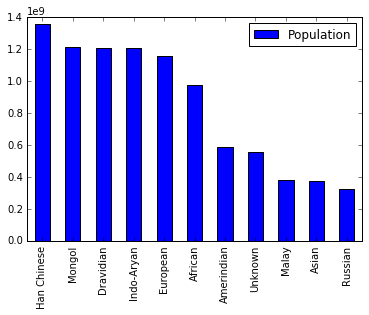

In [291]:
ethnic.head(11).plot(kind='bar')

In [296]:
#QUESTION 4
#What is the name and country of the longest river, largest lake, and airport at highest elevation

#in order to find these maximum values among these particular variables, we define a function as follows:
def find_element_with_max_attribute_value(root, element_string, attribute_string, return_element=False):
    
    largest = (None, 0)
    
    for element in root.findall(element_string):
        
        element_name = element.find('name').text
        
        if element.find(attribute_string) is not None:
            if element.find(attribute_string).text is not None:
                try:
                    attribute_value = int(element.find(attribute_string).text)
                except:
                    try:
                        attribute_value = float(element.find(attribute_string).text)
                    except:
                        print ("Error: attribute could not be converted to a number", element.find(attribute_string).text)
                #print " -", element_name, attribute_value

            if attribute_value > largest[1]:
                largest = (element_name, attribute_value)

                if return_element:
                    largest = (largest[0], largest[1], element)

    return largest
#I'm not very used to writing functions, but this is well written with exception handling and all
#With this niche function written, finding the answers we need is mostly a matter of inputting the correct parameters


longest_river = find_element_with_max_attribute_value(root, "river", "length", return_element=True)
print ("Longest river:", longest_river[0])
print ("Length:", longest_river[1])
print ("Source:", longest_river[2].find('source').attrib['country'])

print ()

largest_lake = find_element_with_max_attribute_value(root, "lake", "area", return_element=True)
print ("Largest lake:", largest_lake[0])
print ("Area:", largest_lake[1])
print ("Located:", largest_lake[2].find('located').attrib['country'])

print ()

airport_at_highest_elevation = find_element_with_max_attribute_value(root, "airport", "elevation", return_element=True)
print ("Airport at highest elevation:", airport_at_highest_elevation[0])
print ("Elevation:", airport_at_highest_elevation[1])
print ("Located:", airport_at_highest_elevation[2].attrib['country'])

#ANSWER TO QUESTION 4

Longest river: Amazonas
Length: 6448
Source: PE

Largest lake: Caspian Sea
Area: 386400
Located: R

Airport at highest elevation: El Alto Intl
Elevation: 4063
Located: BOL
